In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
import spacy
import seaborn as sns
from library.sb_utils import save_file
nlp = spacy.load('en_core_web_sm')

In [3]:
# Load the data. 
reviewdata=pd.read_csv('data/verified_purchase.csv')

In [4]:
reviewdata.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,helpful_votes_ratio
count,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06,2.255839e+06
mean,2.853273e+07,4.977244e+08,4.148925e+00,1.235769e+00,1.488756e+00,2.551940e-01
std,1.536502e+07,2.884760e+08,1.331552e+00,1.139431e+01,1.189656e+01,4.185744e-01
min,1.004900e+04,8.550000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.494642e+07,2.440889e+08,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.755064e+07,4.985021e+08,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.293682e+07,7.465106e+08,5.000000e+00,1.000000e+00,1.000000e+00,6.000000e-01
max,5.309657e+07,9.999961e+08,5.000000e+00,6.832000e+03,6.995000e+03,1.000000e+00


In [5]:
reviewdata.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31,0.000000
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,0.000000
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,0.000000
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,0.666667
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31,0.000000


(array([1617070.,    2630.,    5910.,    9897.,    3336.,   56683.,
          26255.,   19781.,   30961.,  483316.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

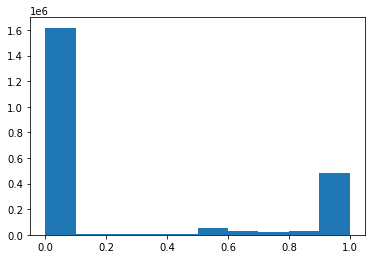

In [6]:
plt.hist(reviewdata['helpful_votes_ratio'])

(array([ 227506.,       0.,  109655.,       0.,       0.,  162873.,
              0.,  355153.,       0., 1400652.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

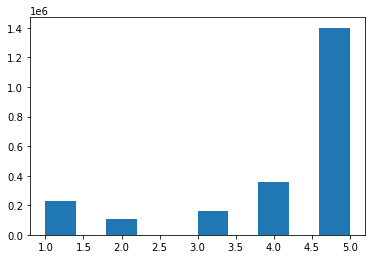

In [7]:
plt.hist(reviewdata['star_rating'])

(array([1.061354e+06, 3.430000e+02, 1.126000e+03, 2.643000e+03,
        5.330000e+02, 2.277700e+04, 9.945000e+03, 7.473000e+03,
        1.275500e+04, 2.817030e+05]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

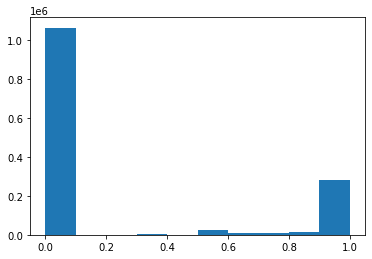

In [8]:
plt.hist(reviewdata[reviewdata['star_rating']==5]['helpful_votes_ratio'])

(array([126387.,   1441.,   2757.,   3654.,   1681.,  13726.,   6932.,
          5344.,   7379.,  58205.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

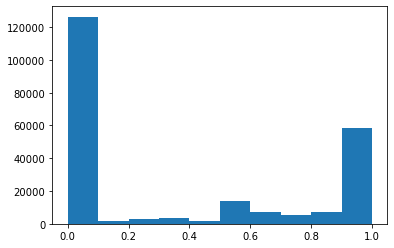

In [9]:
plt.hist(reviewdata[reviewdata['star_rating']==1]['helpful_votes_ratio'])

(array([126052.,   2630.,   5910.,   9897.,   3336.,  56683.,  26255.,
         19781.,  30961., 483316.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

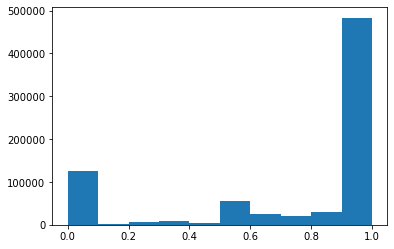

In [10]:
plt.hist(reviewdata[reviewdata['total_votes']!=0]['helpful_votes_ratio'])

In [11]:
reviewdata2=reviewdata[reviewdata['total_votes']!=0]

(array([23195.,  1441.,  2757.,  3654.,  1681., 13726.,  6932.,  5344.,
         7379., 58205.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

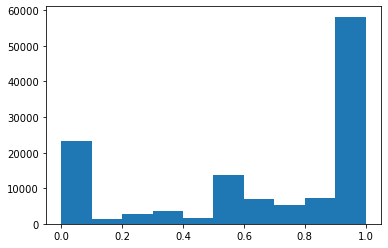

In [12]:
plt.hist(reviewdata2[reviewdata2['star_rating']==1]['helpful_votes_ratio'])

(array([ 58686.,    343.,   1126.,   2643.,    533.,  22777.,   9945.,
          7473.,  12755., 281703.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

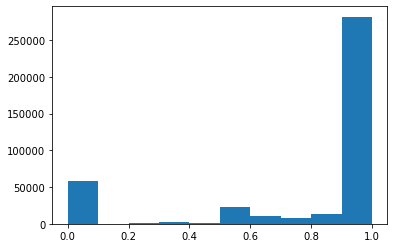

In [13]:
plt.hist(reviewdata2[reviewdata2['star_rating']==5]['helpful_votes_ratio'])

In [14]:
reviewdata['review_length']=reviewdata['review_body'].map(len)

(array([2.254535e+06, 1.150000e+03, 1.120000e+02, 2.500000e+01,
        9.000000e+00, 3.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 3.000000e+00]),
 array([1.00000e+00, 4.88710e+03, 9.77320e+03, 1.46593e+04, 1.95454e+04,
        2.44315e+04, 2.93176e+04, 3.42037e+04, 3.90898e+04, 4.39759e+04,
        4.88620e+04]),
 <BarContainer object of 10 artists>)

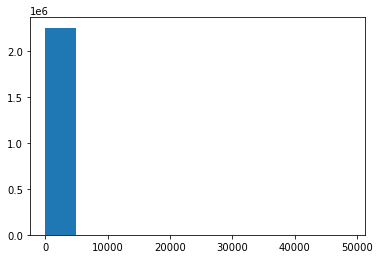

In [15]:
plt.hist(reviewdata['review_length'])

(array([762929., 711474., 295310., 161756.,  95228.,  62284.,  41386.,
         28817.,  20398.,  15111.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <BarContainer object of 10 artists>)

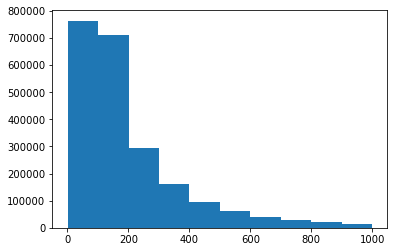

In [16]:
plt.hist(reviewdata[reviewdata['review_length']<1000]['review_length'])

(array([97., 25., 12.,  5.,  3.,  1.,  1.,  0.,  0.,  3.]),
 array([10074. , 13952.8, 17831.6, 21710.4, 25589.2, 29468. , 33346.8,
        37225.6, 41104.4, 44983.2, 48862. ]),
 <BarContainer object of 10 artists>)

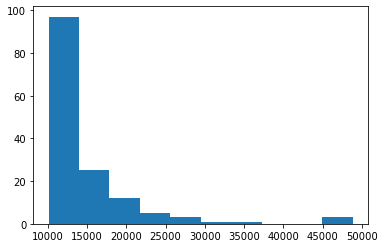

In [17]:
plt.hist(reviewdata[reviewdata['review_length']>10000]['review_length'])

In [18]:
for col in reviewdata:
    print(col,len(reviewdata[col].unique()))

marketplace 1
customer_id 1555997
review_id 2255839
product_id 283339
product_parent 251558
product_title 256449
product_category 1
star_rating 5
helpful_votes 535
total_votes 554
vine 2
verified_purchase 1
review_headline 1128661
review_body 2054872
review_date 5506
helpful_votes_ratio 2212
review_length 5550


In [19]:
countvalue=reviewdata['product_id'].value_counts()

In [20]:
countvalue=pd.DataFrame({'product_id':countvalue.index, 'occurence':countvalue.values})

In [21]:
countvalue.tail()

,product_id,occurence
283334,B00M22LL0C,1
283335,B0006HVPCY,1
283336,B006M7K7G2,1
283337,B005WGBSG2,1
283338,B001F3A2FO,1


In [22]:
count_average=np.zeros(len(countvalue['occurence']))

In [23]:
for i in range(len(countvalue['occurence'])):
    count_average[i]=(np.sum(countvalue['occurence'][-len(countvalue['occurence'])+i:]))

In [24]:
countvalue['arrange_product_id'] = count_average

In [25]:
countvalue.drop(['occurence'], axis=1,inplace=True)

In [26]:
reviewdata = pd.merge(left=reviewdata, right=countvalue, how='left', left_on='product_id', right_on='product_id')

In [27]:
reviewdata.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio,review_length,arrange_product_id
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31,0.000000,14,776479.0
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,0.000000,155,1965205.0
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,0.000000,47,574897.0
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,0.666667,735,2150992.0
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31,0.000000,31,1460887.0


In [28]:
countvalue=reviewdata['product_title'].value_counts()

In [29]:
countvalue=pd.DataFrame({'product_title':countvalue.index, 'occurence':countvalue.values})

In [30]:
count_average=np.zeros(len(countvalue['occurence']))

In [31]:
for i in range(len(countvalue['occurence'])):
    count_average[i]=(np.sum(countvalue['occurence'][-len(countvalue['occurence'])+i:]))

In [32]:
countvalue['arrange_product_title'] = count_average

In [33]:
countvalue.drop(['occurence'], axis=1,inplace=True)

In [34]:
reviewdata = pd.merge(left=reviewdata, right=countvalue, how='left', left_on='product_title', right_on='product_title')

In [35]:
reviewdata.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio,review_length,arrange_product_id,arrange_product_title
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31,0.000000,14,776479.0,697355.0
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,0.000000,155,1965205.0,1881711.0
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,0.000000,47,574897.0,495927.0
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,0.666667,735,2150992.0,2099828.0
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31,0.000000,31,1460887.0,1847624.0


In [36]:
countvalue=reviewdata['product_parent'].value_counts()

In [37]:
countvalue=pd.DataFrame({'product_parent':countvalue.index, 'occurence':countvalue.values})

In [38]:
count_average=np.zeros(len(countvalue['occurence']))

In [39]:
for i in range(len(countvalue['occurence'])):
    count_average[i]=(np.sum(countvalue['occurence'][-len(countvalue['occurence'])+i:]))

In [40]:
countvalue['arrange_product_parent'] = count_average

In [41]:
countvalue.drop(['occurence'], axis=1,inplace=True)

In [42]:
reviewdata = pd.merge(left=reviewdata, right=countvalue, how='left', left_on='product_parent', right_on='product_parent')

In [43]:
reviewdata.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_votes_ratio,review_length,arrange_product_id,arrange_product_title,arrange_product_parent
0,US,43081963,R18RVCKGH1SSI9,B001BM2MAC,307809868,"Scotch Cushion Wrap 7961, 12 Inches x 100 Feet",Office Products,5,0,0,N,Y,Five Stars,Great product.,2015-08-31,0.000000,14,776479.0,697355.0,696055.0
1,US,10951564,R3L4L6LW1PUOFY,B00DZYEXPQ,75004341,"Dust-Off Compressed Gas Duster, Pack of 4",Office Products,5,0,1,N,Y,"Phffffffft, Phfffffft. Lots of air, and it's C...",What's to say about this commodity item except...,2015-08-31,0.000000,155,1965205.0,1881711.0,1885670.0
2,US,21143145,R2J8AWXWTDX2TF,B00RTMUHDW,529689027,Amram Tagger Standard Tag Attaching Tagging Gu...,Office Products,5,0,0,N,Y,but I am sure I will like it.,"Haven't used yet, but I am sure I will like it.",2015-08-31,0.000000,47,574897.0,495927.0,500576.0
3,US,52782374,R1PR37BR7G3M6A,B00D7H8XB6,868449945,AmazonBasics 12-Sheet High-Security Micro-Cut ...,Office Products,1,2,3,N,Y,and the shredder was dirty and the bin was par...,Although this was labeled as &#34;new&#34; the...,2015-08-31,0.666667,735,2150992.0,2099828.0,2103291.0
4,US,24045652,R3BDDDZMZBZDPU,B001XCWP34,33521401,"Derwent Colored Pencils, Inktense Ink Pencils,...",Office Products,4,0,0,N,Y,Four Stars,Gorgeous colors and easy to use,2015-08-31,0.000000,31,1460887.0,1847624.0,1845831.0


In [44]:
countvalue=reviewdata['customer_id'].value_counts()

In [45]:
countvalue=pd.DataFrame({'customer_id':countvalue.index, 'occurence':countvalue.values})

In [46]:
count_average=np.zeros(len(countvalue['occurence']))

In [47]:
for i in range(len(countvalue['occurence'])):
    count_average[i]=(np.sum(countvalue['occurence'][-len(countvalue['occurence'])+i:]))

In [48]:
countvalue['arrange_customer_id'] = count_average

In [49]:
countvalue.drop(['occurence'], axis=1,inplace=True)

In [50]:
reviewdata = pd.merge(left=reviewdata, right=countvalue, how='left', left_on='customer_id', right_on='customer_id')

In [51]:
summarize=reviewdata[['star_rating','helpful_votes','total_votes','helpful_votes_ratio','review_length','arrange_product_id','arrange_product_title','arrange_product_parent','arrange_customer_id']]

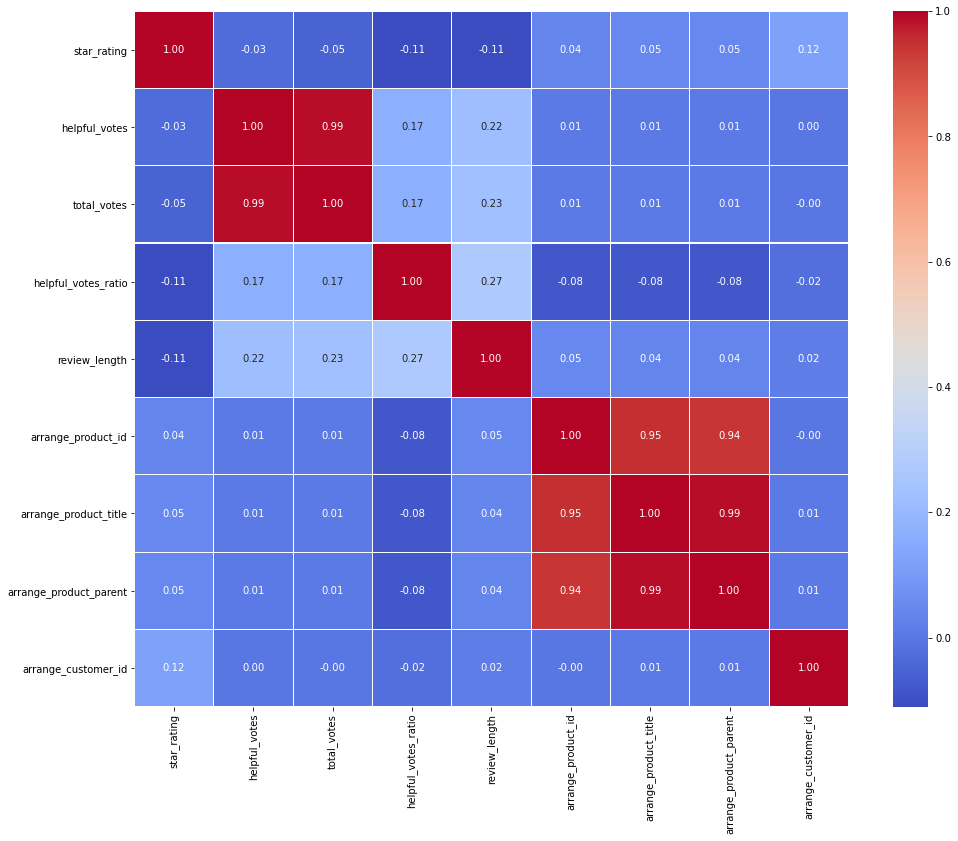

In [52]:
corrmat = summarize.corr()
f, ax = plt.subplots(figsize=(16, 12))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

In [53]:
summarize.iloc[:100]

,star_rating,helpful_votes,total_votes,helpful_votes_ratio,review_length,arrange_product_id,arrange_product_title,arrange_product_parent,arrange_customer_id
0,5,0,0,0.000000,14,776479.0,697355.0,696055.0,1015876.0
1,5,0,1,0.000000,155,1965205.0,1881711.0,1885670.0,1801693.0
2,5,0,0,0.000000,47,574897.0,495927.0,500576.0,548574.0
3,1,2,3,0.666667,735,2150992.0,2099828.0,2103291.0,719312.0
4,4,0,0,0.000000,31,1460887.0,1847624.0,1845831.0,103335.0
...,...,...,...,...,...,...,...,...,...
95,5,0,0,0.000000,13,525428.0,478292.0,478564.0,941495.0
96,1,6,10,0.600000,40,296666.0,271878.0,260206.0,1434514.0
97,5,1,1,1.000000,356,893426.0,794819.0,792179.0,1533322.0
98,5,0,0,0.000000,85,1204484.0,1092447.0,1085953.0,679654.0


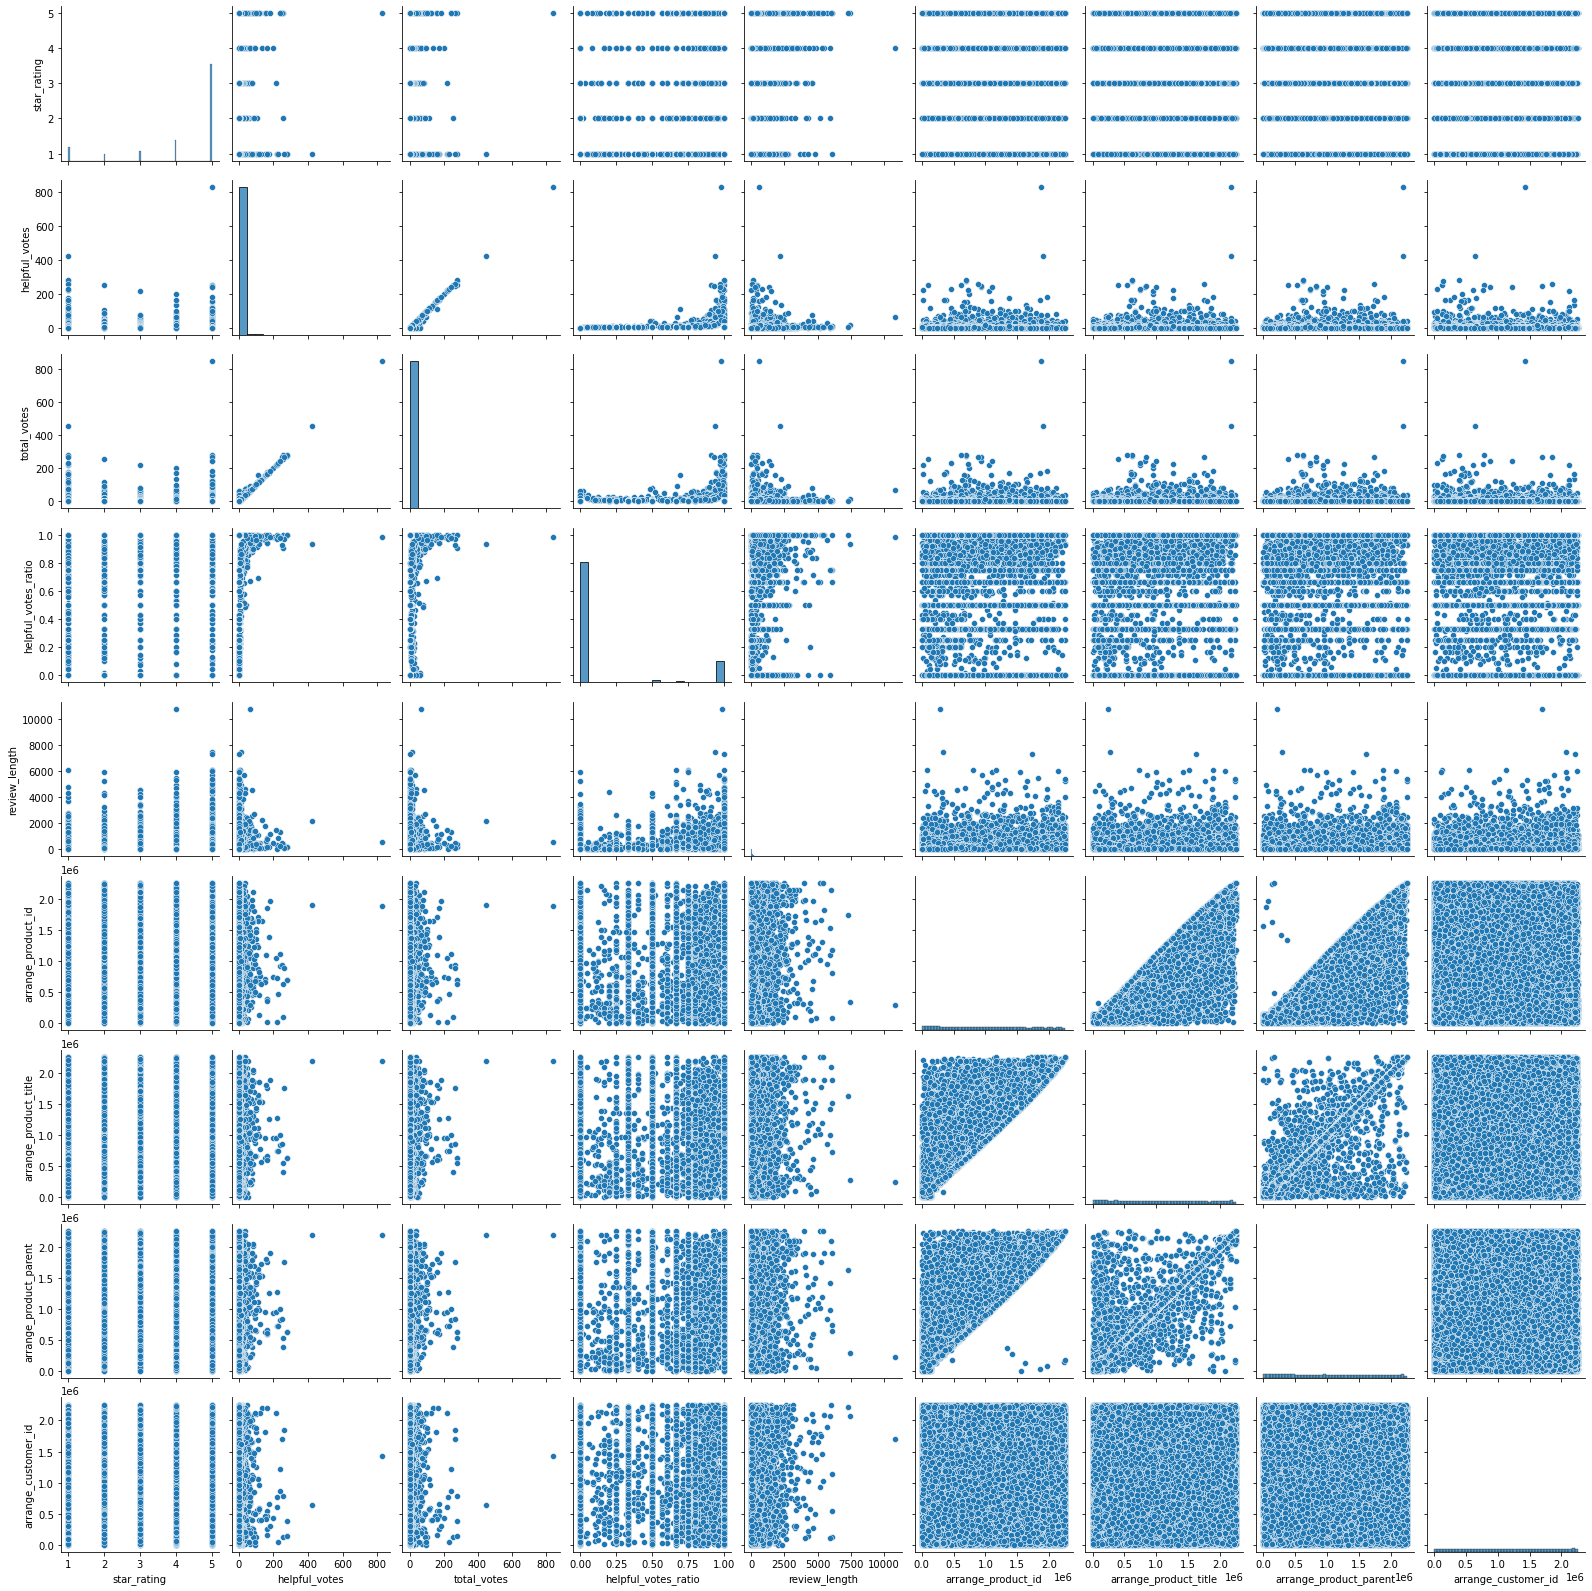

In [57]:
sns.pairplot(summarize.iloc[:100000])

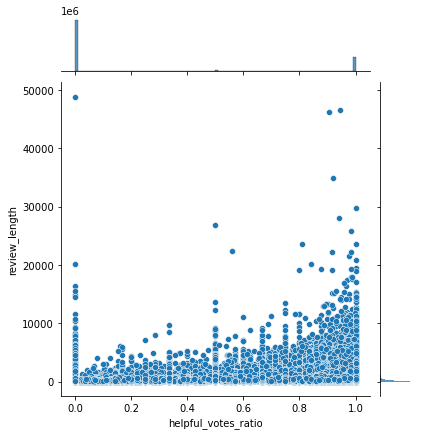

In [59]:
sns.jointplot(y='review_length', x='helpful_votes_ratio', data=summarize)

In [60]:
# save the data to a new csv file
datapath = 'data'
save_file(summarize, 'clean_up_data.csv', datapath)

Writing file.  "data\clean_up_data.csv"
